<a href="https://colab.research.google.com/github/ropas5/eye_diseases_classification_trabajo_DL/blob/main/nootbook/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos los datos desde kaggle, creando la carpeta de data, con los datos comprmidos ( como se descarga por defecto de kaggle), y ha continuacion descomprimimos las carpetas con las imagenes

Versión de Colab

In [4]:
!pip install kaggle

from google.colab import files
import os, zipfile
from glob import glob

# Subir kaggle.json
files.upload()
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

path = "data/raw"

# Descargar
os.makedirs(path, exist_ok=True)
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification -p "{path}" --force

with zipfile.ZipFile(path + "/eye-diseases-classification.zip", 'r') as zip_ref:
    zip_ref.extractall(path)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
 98% 723M/736M [00:11<00:00, 80.2MB/s]
100% 736M/736M [00:12<00:00, 63.7MB/s]


Versión en local

In [ ]:
# import os
# import zipfile

# path = "../data/raw"

# if not os.path.exists(path):
#     os.makedirs(path)

# #Descarga de datos desde kaggle
# !kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification -p path

# #Descomprimir zip
# with zipfile.ZipFile(path +"/eye-diseases-classification.zip", 'r') as zip_ref:
#     zip_ref.extractall(path)

## Preprocesamiento de los datos

In [5]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm

path = path + "/dataset"
target_size = (512, 512)

imgs = []
labels = []
folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

for folder in tqdm(folders):
    folder_path = os.path.join(path, folder) #Creamos la direccion de cada carpeta
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname) #obtenemos direccion de cada archivo
        try:
            with Image.open(fpath) as img:
                img = img.convert("RGB") # Lectura de image
                img = img.resize(target_size)
                arr = np.array(img)
            imgs.append(arr)
            labels.append(folder)
        except Exception as e:
            print("skip:", fpath, str(e))

X = pd.DataFrame({"image": imgs})
y = pd.DataFrame({"labels": labels})


100%|██████████| 4/4 [00:50<00:00, 12.73s/it]


## EDA

In [6]:
print("Tamaño del dataframe:",X.shape)
print("Tamaño de las imagenes:", X['image'].iloc[0].shape)

#Comprobamos que todas las imagenes tengan el mismo tamaño:

shapes = [img.shape for img in X["image"]]

# Convertir a set para ver si hay más de uno
unique_shapes = set(shapes)

print("Dimensiones encontradas:", unique_shapes)

Tamaño del dataframe: (4217, 1)
Tamaño de las imagenes: (512, 512, 3)
Dimensiones encontradas: {(512, 512, 3)}


Visualizacion de imagenes

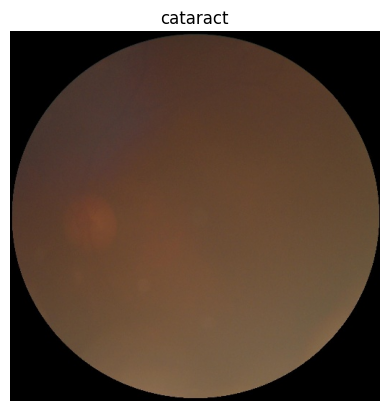

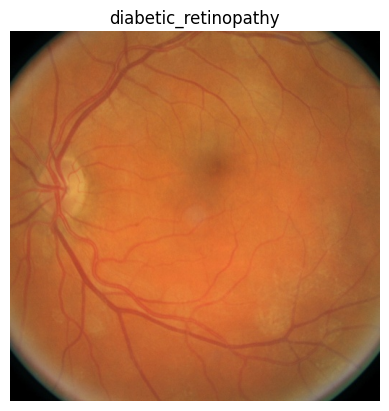

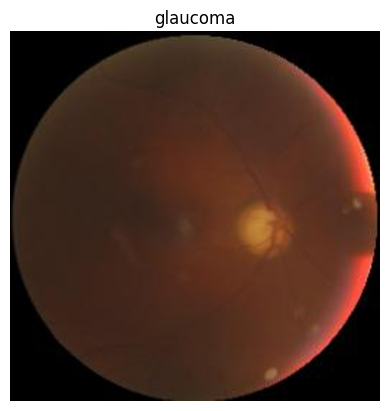

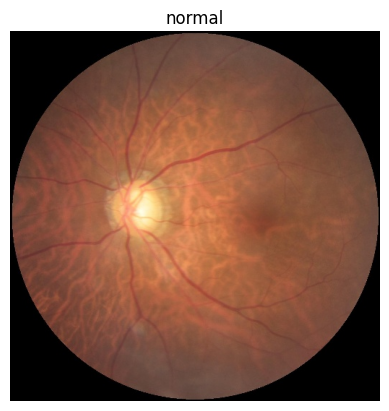

In [7]:
import matplotlib.pyplot as plt

classes = y["labels"].unique()

for label in classes:
    sample = X[y["labels"] == label].iloc[0]
    plt.imshow(sample["image"])
    plt.title(label)
    plt.axis("off")
    plt.show()

Distribución de las categorias

In [8]:
y["labels"].value_counts()

,count
labels,
diabetic_retinopathy,1098
normal,1074
cataract,1038
glaucoma,1007


In [9]:
#Distribución en porcentaje
y["labels"].value_counts(normalize=True) * 100


,proportion
labels,
diabetic_retinopathy,26.037467
normal,25.468342
cataract,24.614655
glaucoma,23.879535


El conjunto de datos está formado por 4217 imágenes RGB de tamaño 512x512.
Todas las imágenes fueron redimensionadas al mismo tamaño, para poder aplicar facilmente la CNN.
La distribución de clases es la siguiente:
- normal 25.4%
- diabetic retinopathy 26%
- cataract 24.6%
- glaucoma 23.9%

Podemos ver como las clases estas bien distribuidas.